In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("./train.csv")

In [3]:
train.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
train.shape

(1460, 81)

In [5]:
train.isnull().sum().sort_values(ascending= False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [6]:
#Dropping the column with plenty of missing data

In [7]:
train.drop(['PoolQC','MiscFeature','Alley','Fence','LotFrontage'],axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


(1460, 81)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

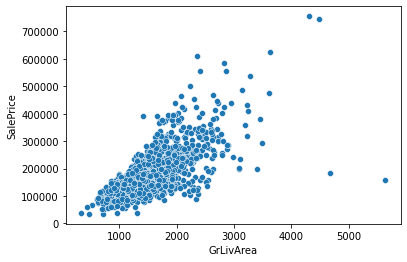

In [8]:
#Detecting outliers
print(train.shape)
sns.scatterplot(y="SalePrice", x="GrLivArea", data=train)

In [9]:
train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index, inplace=True)
print('Rows and columns after dropping outliers :' , train.shape )

Rows and columns after dropping outliers : (1458, 81)


Text(0.5, 1.0, 'MSSubClass Count')

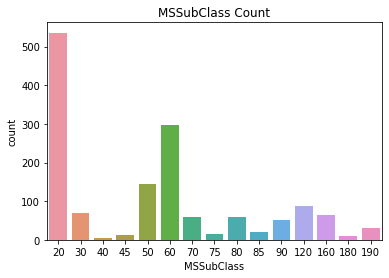

In [10]:
#MSSubClass : It identifies the type of dwelling involved in the sale.
sns.countplot(x="MSSubClass",data=train)
plt.title('MSSubClass Count')
# It contains pretty imbalanced data and I can't get any good insights from it ,so neglecting its effect. 

In [11]:
cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath',  'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
features=[]
obj_col=[]
for col in cols:
    if (train[col].dtype) == object :
        obj_col.append(col)
obj_col        

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
#Plotting
def plotting(col):
    sns.countplot(x=col,data=train)
    plt.title('CountPlot for '+ col)
    print('No. of missing values are : ')
    print(train[col].isnull().sum())
    
    

No. of missing values are : 
0


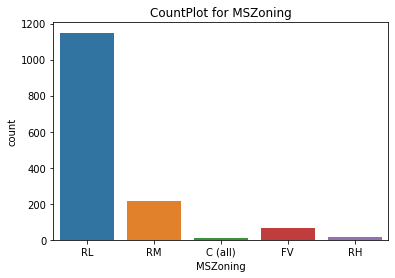

In [13]:
#Zoning Classification :  Identifies the general zoning classification of the sale.
plotting('MSZoning')
#It contains pretty imbalanced data and I can't get any good insights from it ,so neglecting its effect. 

No. of missing values are : 
0


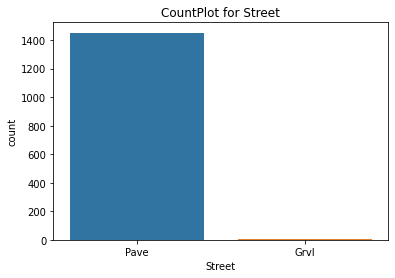

In [15]:
#Street : Type of road access to property
plotting('Street')
#It contains pretty imbalanced data and I can't get any good insights from it ,so neglecting its effect. 

No. of missing values are : 
0


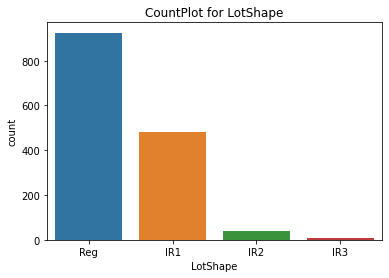

In [16]:
# Lot Shape : General shape of property
plotting('LotShape')
features.append('LotShape')
# It looks bit fine for considering this feature for final prediction.
# Mapping its values
train.LotShape=train.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})

No. of missing values are : 
0


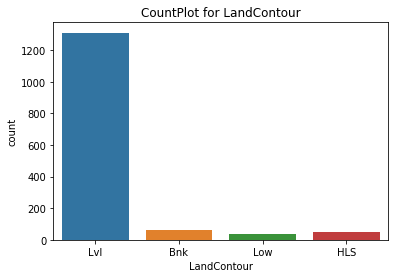

In [17]:
#LandContour: Flatness of the property
plotting('LandContour')
#It is biased towards only one category so it should be avoided


No. of missing values are : 
0


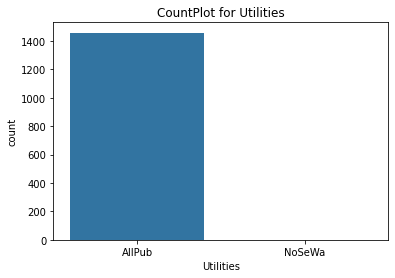

In [19]:
# Utilities: Type of utilities available
plotting('Utilities')
#Again a biased factor, so it should be avoided.


No. of missing values are : 
0


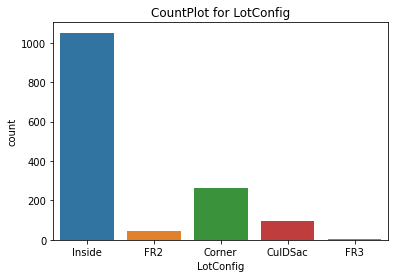

In [20]:
#LotConfig: Lot configuration
plotting('LotConfig')
# Well it looks okayish as CornerLotConfig will surely boost the price.
features.append('LotConfig')
#Mapping the values to make this column suitable for model.
train.LotConfig=train.LotConfig.replace({'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5})

No. of missing values are : 
0


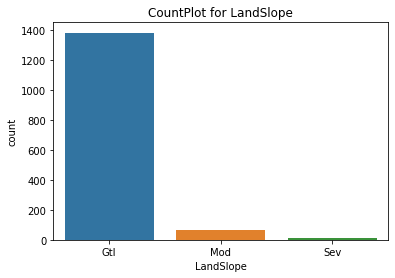

In [21]:
#LandSlope: Slope of property
plotting('LandSlope')
#This seems more biased towards Gentle Slope, so avoiding it.

                  SalePrice
Neighborhood               
1              98576.470588
2             101443.018868
3             127163.769517
4             138242.336634
5             154163.551724
6             189777.028436
7             202038.065041
8             231219.029630
9             310499.000000
10            322880.898305
mes           145847.080000
No. of missing values are : 
0


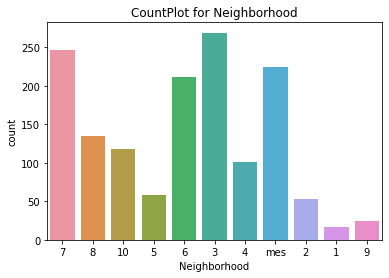

In [23]:
#Neighborhood: Physical locations within Ames city limits
train_neighbor=train.copy()
print(train_neighbor[['Neighborhood','SalePrice']].groupby(['Neighborhood'],as_index=True).mean())
plotting('Neighborhood')
#This looks promising as Price varies from area to area and it can be seen through the mean of the prices of selected Neighborhood.
features.append('Neighborhood')
train.Neighborhood=train.Neighborhood.replace({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})

No. of missing values are : 
0


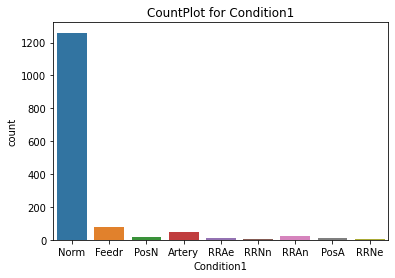

In [30]:
#Condition1: Proximity to various conditions
plotting('Condition1')
#Oops ,this looks totally biased.      
    

No. of missing values are : 
0


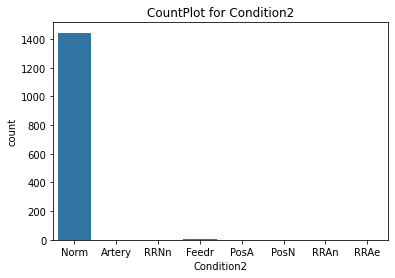

In [24]:
#Condition2: Proximity to various conditions (if more than one is present)
plotting('Condition2')
#JUst like, again biased data.

No. of missing values are : 
0


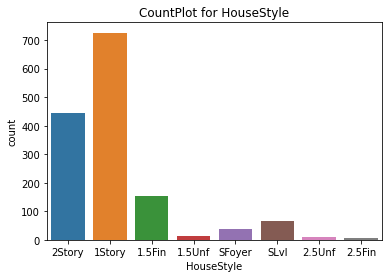

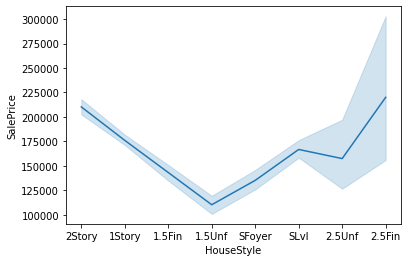

In [25]:
#HouseStyle: Style of dwelling
plotting('HouseStyle')
plt.show()
sns.lineplot(y='SalePrice',x='HouseStyle',data=train)
#Clearly it can be seen from the plots that HouseStyle has big effect on Saleprice.
features.append('HouseStyle')
#Mapping values 
train.HouseStyle=train.HouseStyle.replace({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})

No. of missing values are : 
0


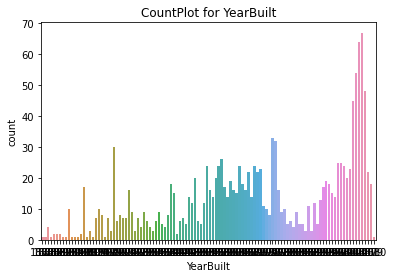

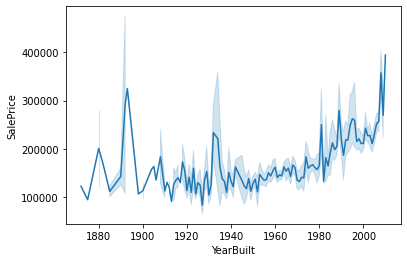

In [26]:
#YearBuilt: Original construction
plotting('YearBuilt')
plt.show()
sns.lineplot(y='SalePrice',x='YearBuilt',data=train)
# It is clearly visible. So it should be part of our features variable.
features.append('YearBuilt')

No. of missing values are : 
0


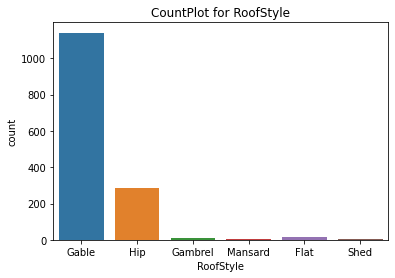

No. of missing values are : 
0


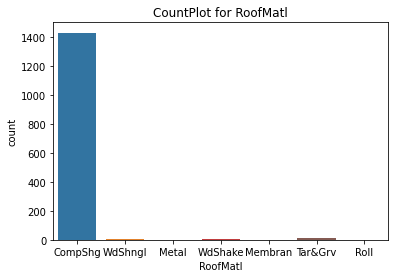

In [27]:
#Roof Style : Type of roof
plotting('RoofStyle')
plt.show()
#RoofMatl: Roof material
plotting('RoofMatl')
    
#Both are biased.    

No. of missing values are : 
0


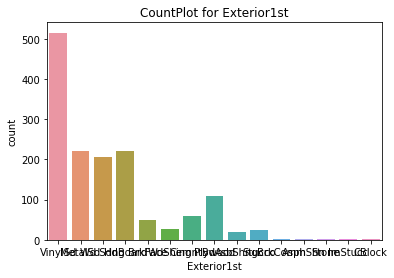

No. of missing values are : 
0


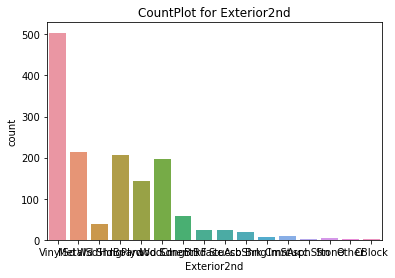

In [28]:
#Exteriors
#Exterior1st: Exterior covering on house
plotting('Exterior1st')
plt.show()
#Exterior2nd: Exterior covering on house (if more than one material)
plotting('Exterior2nd')
plt.show()

train.Exterior1st=train.Exterior1st.replace({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
features.append('Exterior1st')

No. of missing values are : 
0


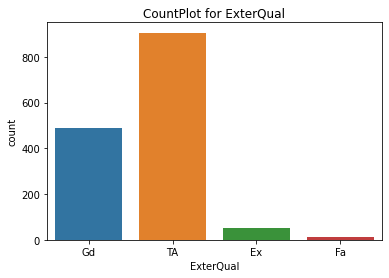

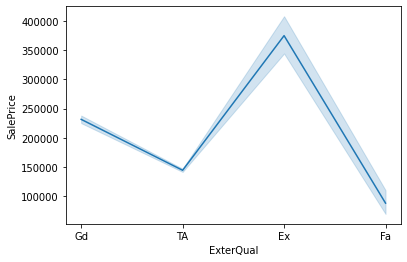

In [29]:
#feetExterQual: Evaluates the quality of the material on the exterior 

plotting('ExterQual')
plt.show()
sns.lineplot(y='SalePrice',x='ExterQual',data=train)
features.append('ExterQual')
train.ExterQual = train.ExterQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

No. of missing values are : 
37


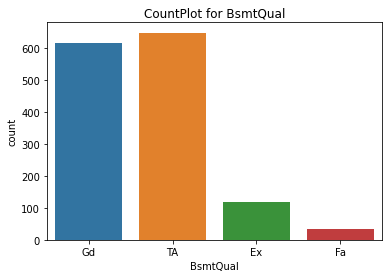

In [30]:
#BsmtQual: Evaluates the height of the basement
plotting('BsmtQual')
train.BsmtQual=train.BsmtQual.fillna('None').replace({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
features.append('BsmtQual')

No. of missing values are : 
38


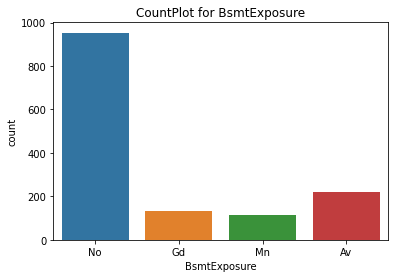

In [31]:
#BsmtExposure: Refers to walkout or garden level walls
plotting('BsmtExposure')
train.BsmtExposure=train.BsmtExposure.fillna('None').replace({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
features.append('BsmtExposure')

No. of missing values are : 
0


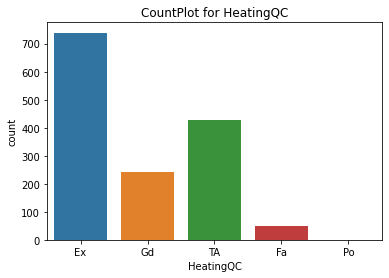

In [32]:
#HeatingQC :Heating quality and condition  
plotting('HeatingQC')
train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('HeatingQC')

No. of missing values are : 
0


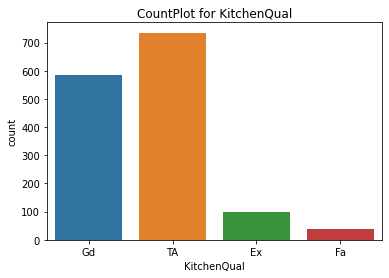

In [33]:
#KitchenQual: Kitchen quality
plotting('KitchenQual')
train.KitchenQual.replace({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},inplace=True)
features.append('KitchenQual')

No. of missing values are : 
690


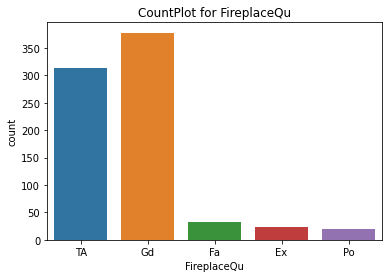

In [34]:
#FireplaceQu: Fireplace quality
plotting('FireplaceQu')
train.FireplaceQu.fillna('None',inplace=True)
train.FireplaceQu.replace({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},inplace=True)
features.append('FireplaceQu')

No. of missing values are : 
81


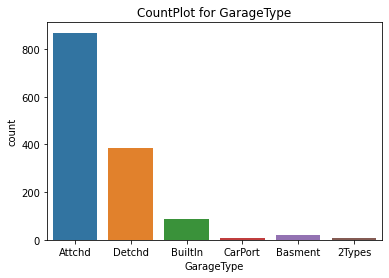

In [35]:
#GarageType: Garage location
plotting('GarageType')
train.GarageType.fillna('None',inplace=True)

train.GarageType.replace({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5},inplace=True)
features.append('GarageType')

No. of missing values are : 
81


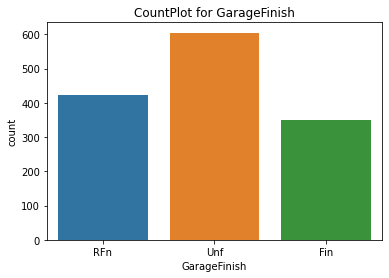

In [36]:
#GarageFinish: Interior finish of the garage
plotting('GarageFinish')
train.GarageFinish.fillna('None',inplace=True)
train.GarageFinish.replace({'None':1, 'Unf':2, 'RFn':3, 'Fin':4},inplace=True)
features.append('GarageFinish')


In [37]:
full=pd.concat([train],ignore_index=True)
full.drop('Id',axis=1,inplace=True)
full.shape

(1458, 80)

In [38]:
full.isnull().sum().sort_values(ascending=False)

PoolQC         1452
MiscFeature    1404
Alley          1367
Fence          1177
LotFrontage     259
               ... 
HalfBath          0
Bedroom           0
Kitchen           0
KitchenQual       0
MSSubClass        0
Length: 80, dtype: int64

In [39]:
train.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])


LotFrontage             
                    mean median count
Neighborhood                         
1              27.800000   21.0    15
2              49.400000   50.0    50
3              62.440000   60.0   250
4              68.164384   66.0    73
5              63.930233   69.0    43
6              77.409722   76.0   144
7              70.726804   70.0   194
8              68.400000   75.0   115
9              62.700000   61.5    20
10             84.908257   90.0   109
mes            76.462366   73.0   186

In [40]:
train['LotAreaCut'] = pd.qcut(train.LotArea,10)

train.groupby([train['LotAreaCut']])[['LotFrontage']].agg(['mean','median','count'])


LotFrontage             
                           mean median count
LotAreaCut                                  
(1299.999, 5000.0]    36.691057   35.0   123
(5000.0, 7071.2]      55.984252   52.0   127
(7071.2, 8063.1]      63.869919   61.0   123
(8063.1, 8788.8]      67.143939   65.0   132
(8788.8, 9475.0]      70.544715   70.0   123
(9475.0, 10193.0]     75.195312   76.0   128
(10193.0, 11049.9]    73.780488   75.0   123
(11049.9, 12194.6]    84.649123   84.5   114
(12194.6, 14340.9]    84.733945   85.0   109
(14340.9, 215245.0]   93.628866   90.0    97

In [41]:
train['LotFrontage']= train.groupby(['LotAreaCut','Neighborhood'])['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [42]:
columns = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in columns:
    train[col].fillna(0,inplace= True)

In [43]:
columns = ["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in columns:
    train[col].fillna(0,inplace= True)

In [44]:
columns2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional",
            "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]

for col2 in columns2:
    train[col2].fillna(full[col2].mode()[0],inplace = True)

In [45]:
train.drop("LotAreaCut",axis=1,inplace=True)

In [46]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [47]:
cols_num = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath","MoSold",
          "YrSold","YearBuilt","YearRemodAdd","LowQualFinSF","GarageYrBlt"]

for i in cols_num :
    train[i]=train[i].astype(str)

In [48]:
features

['LotShape',
 'LotConfig',
 'Neighborhood',
 'Neighborhood',
 'HouseStyle',
 'YearBuilt',
 'Exterior1st',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [49]:
train.isnull().sum(0).sort_values(ascending=False)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
GarageCond        81
                ... 
Bedroom            0
Kitchen            0
KitchenQual        0
TotRmsAbvGrd       0
Id                 0
Length: 81, dtype: int64

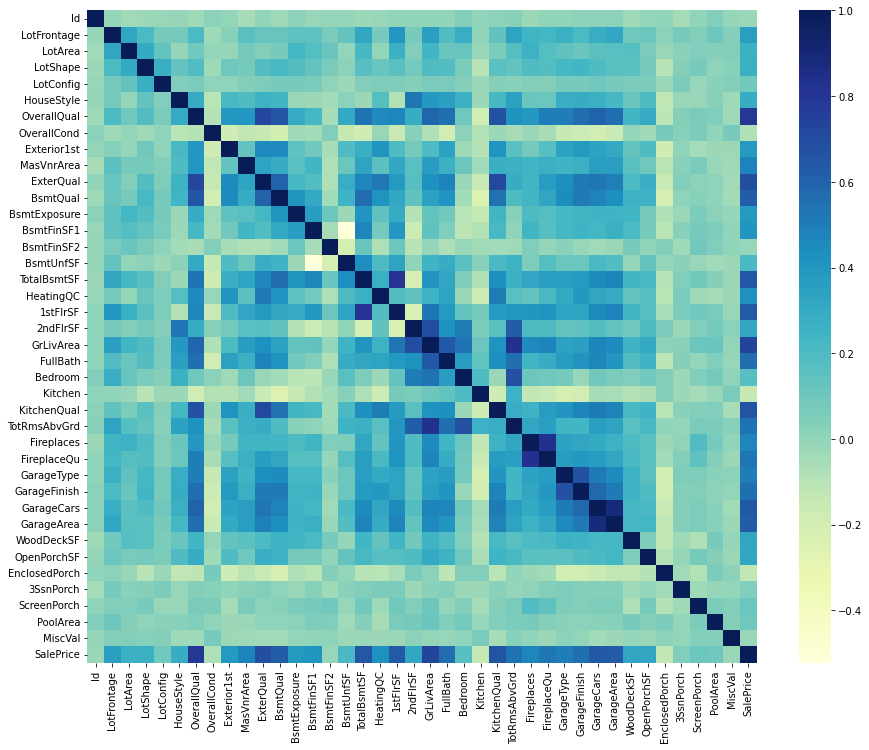

In [59]:
#Checking correlation via heatmap:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),cmap="YlGnBu")
plt.show()

In [50]:
core=train.corr()
core_des=core.sort_values(by='SalePrice',ascending=False)
core_des

,Id,LotFrontage,LotArea,LotShape,LotConfig,HouseStyle,OverallQual,OverallCond,Exterior1st,MasVnrArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
SalePrice,-0.021673,0.361292,0.268179,0.270477,0.092499,0.292263,0.795774,-0.077948,0.383349,0.477810,...,0.641047,0.629217,0.324758,0.321142,-0.128646,0.044568,0.111415,0.099490,-0.021203,1.000000
OverallQual,-0.030213,0.206488,0.091392,0.190817,0.064424,0.295311,1.000000,-0.090442,0.396564,0.398785,...,0.600741,0.557230,0.236753,0.297186,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.795774
GrLivArea,0.003138,0.353064,0.232927,0.192468,0.060986,0.387912,0.589414,-0.077423,0.201821,0.368356,...,0.475442,0.456358,0.247120,0.302569,0.012976,0.022520,0.107768,0.115999,-0.001637,0.734968
ExterQual,0.003413,0.122734,0.040373,0.180443,0.051259,0.252170,0.723286,-0.137724,0.453298,0.336020,...,0.525960,0.490152,0.205586,0.279707,-0.149025,0.037582,0.013799,0.012827,-0.039184,0.686756
KitchenQual,0.013709,0.140458,0.055988,0.151122,0.034402,0.224432,0.670627,-0.025207,0.414404,0.274701,...,0.509042,0.485394,0.219112,0.249783,-0.105126,0.022769,0.031731,0.046646,-0.054012,0.662236
TotalBsmtSF,-0.025908,0.313779,0.223914,0.172605,0.042197,-0.028472,0.538595,-0.174931,0.274877,0.339578,...,0.451890,0.475069,0.234476,0.215140,-0.096773,0.040921,0.092574,0.036089,-0.018514,0.651153
GarageCars,0.016863,0.281073,0.152484,0.194461,0.097318,0.272117,0.600741,-0.185275,0.343039,0.360825,...,1.000000,0.887304,0.225462,0.209968,-0.151110,0.035957,0.050909,0.019446,-0.043004,0.641047
1stFlrSF,0.003921,0.394293,0.269234,0.165273,0.048999,-0.086386,0.469092,-0.144717,0.194570,0.318180,...,0.449195,0.477299,0.235439,0.178859,-0.064247,0.059521,0.095042,0.062756,-0.021045,0.631530
GarageArea,0.014316,0.317903,0.163680,0.161068,0.068097,0.221161,0.557230,-0.150503,0.308125,0.360786,...,0.887304,1.000000,0.222482,0.228246,-0.121194,0.035880,0.053015,0.026642,-0.027236,0.629217
BsmtQual,-0.033854,0.121623,0.067061,0.217596,0.083792,0.241591,0.658657,-0.200155,0.453887,0.291706,...,0.485119,0.432817,0.262482,0.260816,-0.203033,0.010975,0.030462,0.012592,-0.043146,0.624758


In [51]:
core_des_top=core_des[(core_des['SalePrice']>0.5) & (core_des['SalePrice'] !=1)]
core_des_top.index

Index(['OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual', 'TotalBsmtSF',
       'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual', 'FullBath',
       'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu'],
      dtype='object')

In [52]:
features.append(['OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu',
       'Foundation'])

In [53]:
core_des_low=core_des[(core_des['SalePrice']<0)]
core_des_low.index

Index(['BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch',
       'Kitchen'],
      dtype='object')

In [54]:
features.append(['BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch'])


In [55]:
features=['LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'Exterior1st',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'OverallQual',
  'GrLivArea',
  'Neighborhood',
  'ExterQual',
  'KitchenQual',
  'TotalBsmtSF',
  'GarageCars',
  '1stFlrSF',
  'GarageArea',
  'BsmtQual',
  'FullBath',
  'GarageFinish',
  'TotRmsAbvGrd',
  'FireplaceQu',
  'Foundation',
 'BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch','SalePrice']

In [68]:
train_d=train.copy()

In [69]:
train_d=train_d[features]

In [70]:
train_d

,LotShape,LotConfig,Neighborhood,HouseStyle,Exterior1st,ExterQual,Foundation,BsmtQual,BsmtExposure,HeatingQC,...,GarageFinish,TotRmsAbvGrd,FireplaceQu,Foundation,BsmtFinSF2,MiscVal,Id,OverallCond,EnclosedPorch,SalePrice
0,1,1,7,4,5,3,PConc,4,2,5,...,3,8,1,PConc,0,0,1,5,0,208500
1,1,4,8,3,3,2,CBlock,4,4,5,...,3,6,3,CBlock,0,0,2,8,0,181500
2,2,1,7,4,5,3,PConc,4,3,5,...,3,6,3,PConc,0,0,3,5,0,223500
3,2,2,7,4,3,2,BrkTil,3,2,4,...,2,7,4,BrkTil,0,0,4,5,272,140000
4,2,4,10,4,5,3,PConc,4,3,5,...,3,9,3,PConc,0,0,5,5,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,1,6,4,5,2,PConc,4,2,5,...,3,7,3,PConc,0,0,1456,5,0,175000
1456,1,1,6,3,4,2,CBlock,4,2,3,...,2,7,3,CBlock,163,0,1457,6,0,210000
1457,1,1,7,4,6,4,Stone,3,2,5,...,3,9,4,Stone,0,2500,1458,9,0,266500
1458,1,1,mes,3,3,2,CBlock,3,3,4,...,2,5,1,CBlock,1029,0,1459,6,112,142125


In [71]:
train_d=pd.get_dummies(train_d)


In [72]:
train_d.columns

Index(['LotShape', 'LotConfig', 'HouseStyle', 'Exterior1st', 'ExterQual',
       'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'OverallQual', 'GrLivArea', 'ExterQual',
       'KitchenQual', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea',
       'BsmtQual', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu',
       'BsmtFinSF2', 'MiscVal', 'Id', 'OverallCond', 'EnclosedPorch',
       'SalePrice', 'Neighborhood_1', 'Neighborhood_2', 'Neighborhood_3',
       'Neighborhood_4', 'Neighborhood_5', 'Neighborhood_6', 'Neighborhood_7',
       'Neighborhood_8', 'Neighborhood_9', 'Neighborhood_10',
       'Neighborhood_mes', 'Foundation_BrkTil', 'Foundation_CBlock',
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'Neighborhood_1', 'Neighborhood_2', 'Neighborhood_3',
       'Neighborhood_4', 'Neighborhood_5', 'Neighborhood_6', 'Neighborhood_7',
       'Neighborhood_8', 'Neighborho

In [73]:
for col in train_d.columns:
    print(col,)

LotShape
LotConfig
HouseStyle
Exterior1st
ExterQual
BsmtQual
BsmtExposure
HeatingQC
KitchenQual
FireplaceQu
GarageType
GarageFinish
OverallQual
GrLivArea
ExterQual
KitchenQual
TotalBsmtSF
GarageCars
1stFlrSF
GarageArea
BsmtQual
FullBath
GarageFinish
TotRmsAbvGrd
FireplaceQu
BsmtFinSF2
MiscVal
Id
OverallCond
EnclosedPorch
SalePrice
Neighborhood_1
Neighborhood_2
Neighborhood_3
Neighborhood_4
Neighborhood_5
Neighborhood_6
Neighborhood_7
Neighborhood_8
Neighborhood_9
Neighborhood_10
Neighborhood_mes
Foundation_BrkTil
Foundation_CBlock
Foundation_PConc
Foundation_Slab
Foundation_Stone
Foundation_Wood
Neighborhood_1
Neighborhood_2
Neighborhood_3
Neighborhood_4
Neighborhood_5
Neighborhood_6
Neighborhood_7
Neighborhood_8
Neighborhood_9
Neighborhood_10
Neighborhood_mes
Foundation_BrkTil
Foundation_CBlock
Foundation_PConc
Foundation_Slab
Foundation_Stone
Foundation_Wood


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
predictors=train_d.drop(['Id','SalePrice'],axis=1)
target=train.SalePrice
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.35,random_state=0)


In [75]:
from sklearn.model_selection import KFold,cross_val_score
logreg = LinearRegression()
logreg.fit(x_train, y_train)

LinearRegression()

In [76]:
logreg.predict(x_cv)

array([135709.31033627, 161403.18765005,  74459.80977197, 117837.63490327,
       279826.04326586, 146340.92122534, 211837.92549834, 112109.54158211,
       144959.50553428, 124201.35322887, 195820.95615693, 100982.18394765,
       107401.48083235, 152061.63927808,  94309.63553682, 232740.6556998 ,
       215992.49440033,  82720.95664875, 162896.58722426, 393274.15847424,
       303500.89634987, 107934.81679702, 120317.27541227, 111028.67176034,
        98563.74633757, 232663.90827921, 202841.51794606, 100964.72158017,
       140528.40117435, 394127.13403041, 172601.47955613, 222796.36538682,
       151489.68758477, 228986.40536886,  75248.45664306, 112331.49095206,
       240044.40002578, 286244.81862592,  94346.51554514,  63490.32951827,
       114227.8149902 , 248215.61823386,  95411.34593054, 116628.82000606,
       176678.25697702, 178131.7314568 , 315710.84538739, 331290.85571433,
       417163.73516662, 253949.57156846, 253111.38721886,  95987.79646018,
       153429.96481645, 1

In [77]:
from sklearn.metrics import accuracy_score
y_pred=logreg.predict(x_cv)
logreg.score(x_cv,y_cv)

0.8612174496400413

In [78]:
features_train=['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'Exterior1st',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'OverallQual', 'GrLivArea', 'Neighborhood', 'ExterQual', 'KitchenQual',
       'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'GarageArea', 'BsmtQual',
       'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'FireplaceQu', 'Foundation',
       'BsmtFinSF2', 'MiscVal','OverallCond', 'EnclosedPorch']
